<a href="https://colab.research.google.com/github/arunzoro-03/arun/blob/main/Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


In [12]:
df =pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [10]:
df =pd.read_csv('TSLA.csv')
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [11]:
df =pd.read_csv('TSLA.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [13]:
df.apply(lambda x: len(x.unique()))

Date         2956
Open         2666
High         2662
Low          2672
Close        2764
Adj Close    2764
Volume       2925
dtype: int64

<Figure size 2500x2000 with 0 Axes>

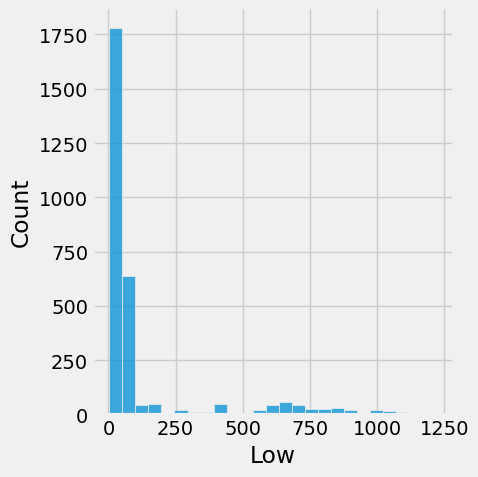

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,20))
sns.displot(df['Low'],bins=25)

In [56]:
x=df.drop(columns=['Low', 'High', 'Open'])
y=df['Open']

In [55]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, x, y):
  x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.25)
  model.fit(x_train, y_train)

  pred = model.predict(x_test)

  cv_score = cross_val_score(model, x, y, scoring='neg_mean_squarred_error', cv=5)
  cv_score = np.abs(np.mean(cv_score))

  print("Results")
  print("MSE:", np.sqrt(mean_squarred_error(y_test, pred)))
  print("CV Score:", np.sqrt(cv_score))

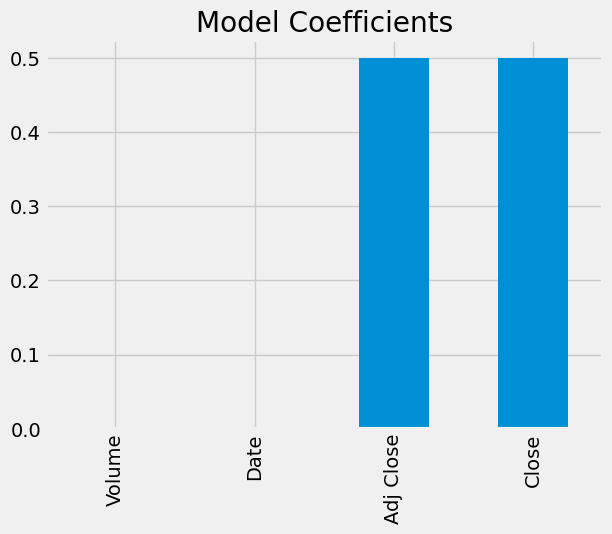

In [70]:
x.dtypes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in x.select_dtypes(include='object'):
    x[col] = le.fit_transform(x[col])
model.fit(x, y)
coef = pd.Series(model.coef_, index=x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')
plt.show()